#**READ THE DATA**

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/NandhiniR1989/MLDataset/refs/heads/main/Women%20Dresses%20Reviews%20Dataset%20.csv')
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [2]:
df.tail()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1
23485,23485,56,General,Jackets,Jackets,984,NaN,Super cute jacket .perfect for fall i can't st...,0,5,1


In [3]:
df.shape

(23486, 11)

#**EXPLORATORY DATA ANALYSIS**

##**Rename the columns**

In [4]:
df.rename(columns= {
    'class_name': 'clothing_class',
    'alike_feedback_count': 'feedback_likes',
    'rating': 'review_rating',
    'recommend_index ': 'recommendation'
    }, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   s.no             23486 non-null  int64 
 1   age              23486 non-null  int64 
 2   division_name    23472 non-null  object
 3   department_name  23472 non-null  object
 4   clothing_class   23472 non-null  object
 5   clothing_id      23486 non-null  int64 
 6   title            19676 non-null  object
 7   review_text      22641 non-null  object
 8   feedback_likes   23486 non-null  int64 
 9   review_rating    23486 non-null  int64 
 10  recommendation   23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


##**Identify the Missing Value and Handle Missing Value**

In [6]:
df.isnull().sum()

,0
s.no,0
age,0
division_name,14
department_name,14
clothing_class,14
clothing_id,0
title,3810
review_text,845
feedback_likes,0
review_rating,0


In [7]:
# Drop columns with a high number of missing values
df.drop(columns=['title', 'review_text'], inplace=True)

In [8]:
df.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'clothing_class',
       'clothing_id', 'feedback_likes', 'review_rating', 'recommendation'],
      dtype='object')

##**Imputation**

In [9]:
categorical_cols =  df.select_dtypes(include=['object']).columns     # IDENTIFY THE CATEGORICAL COLUMNS
print(categorical_cols)

Index(['division_name', 'department_name', 'clothing_class'], dtype='object')


##**Identifying unique values in categorical features**

In [10]:
#Check Unique Value count in Categorical Columns:
for col in categorical_cols:
  print(f"{col}: {df[col].nunique()}")

division_name: 3
department_name: 6
clothing_class: 20


In [11]:
# Identify the unique values in categorical columns:

for col in categorical_cols:
    print(f"{col}: \t {list(df[col].unique())}")

division_name: 	 ['General', 'General Petite', 'Initmates', nan]
department_name: 	 ['Bottoms', 'Tops', 'Intimate', 'Jackets', 'Dresses', 'Trend', nan]
clothing_class: 	 ['Jeans', 'Blouses', 'Skirts', 'Pants', 'Swim', 'Sweaters', 'Knits', 'Fine gauge', 'Jackets', 'Dresses', 'Shorts', 'Lounge', 'Outerwear', 'Intimates', 'Legwear', 'Sleep', 'Trend', 'Layering', nan, 'Casual bottoms', 'Chemises']


In [12]:
#   Fill null values with their respective mode
categorical_cols =  df.select_dtypes(include=['object']).columns     # IDENTIFY THE UPDATED CATEGORICAL COLUMNS
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
# Identify the UPDATED unique values in categorical columns:

for col in categorical_cols:
    print(f"{col}: \t {list(df[col].unique())}")

division_name: 	 ['General', 'General Petite', 'Initmates']
department_name: 	 ['Bottoms', 'Tops', 'Intimate', 'Jackets', 'Dresses', 'Trend']
clothing_class: 	 ['Jeans', 'Blouses', 'Skirts', 'Pants', 'Swim', 'Sweaters', 'Knits', 'Fine gauge', 'Jackets', 'Dresses', 'Shorts', 'Lounge', 'Outerwear', 'Intimates', 'Legwear', 'Sleep', 'Trend', 'Layering', 'Casual bottoms', 'Chemises']


In [14]:
#Value Count of Categorical Columns

for col in categorical_cols:
    print(f"Value counts for {col}:\t{df[col].value_counts()}\n")

Value counts for division_name:	division_name
General           13864
General Petite     8120
Initmates          1502
Name: count, dtype: int64

Value counts for department_name:	department_name
Tops        10482
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

Value counts for clothing_class:	clothing_class
Dresses           6333
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64



In [15]:
df[categorical_cols].isnull().sum()

,0
division_name,0
department_name,0
clothing_class,0


##**Summary statistics of numerical features**

In [16]:
numerical_cols = df.select_dtypes(include=['int64']).columns #IDENTIFY NUMERICAL COLUMNS

In [17]:
df[numerical_cols].isnull().sum()

,0
s.no,0
age,0
clothing_id,0
feedback_likes,0
review_rating,0
recommendation,0


In [18]:
df[numerical_cols].describe().astype(int)

,s.no,age,clothing_id,feedback_likes,review_rating,recommendation
count,23486,23486,23486,23486,23486,23486
mean,11742,43,918,2,4,0
std,6779,12,203,5,1,0
min,0,18,0,0,1,0
25%,5871,34,861,0,4,1
50%,11742,41,936,1,5,1
75%,17613,52,1078,3,5,1
max,23485,99,1205,122,5,1


In [19]:
df.head()

,s.no,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommendation
0,0,40,General,Bottoms,Jeans,1028,0,5,1
1,1,62,General Petite,Tops,Blouses,850,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,0,5,1
4,4,37,Initmates,Intimate,Swim,24,0,5,1


In [20]:
df.duplicated().sum()

0

##**Distribution of Categorical Columns**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

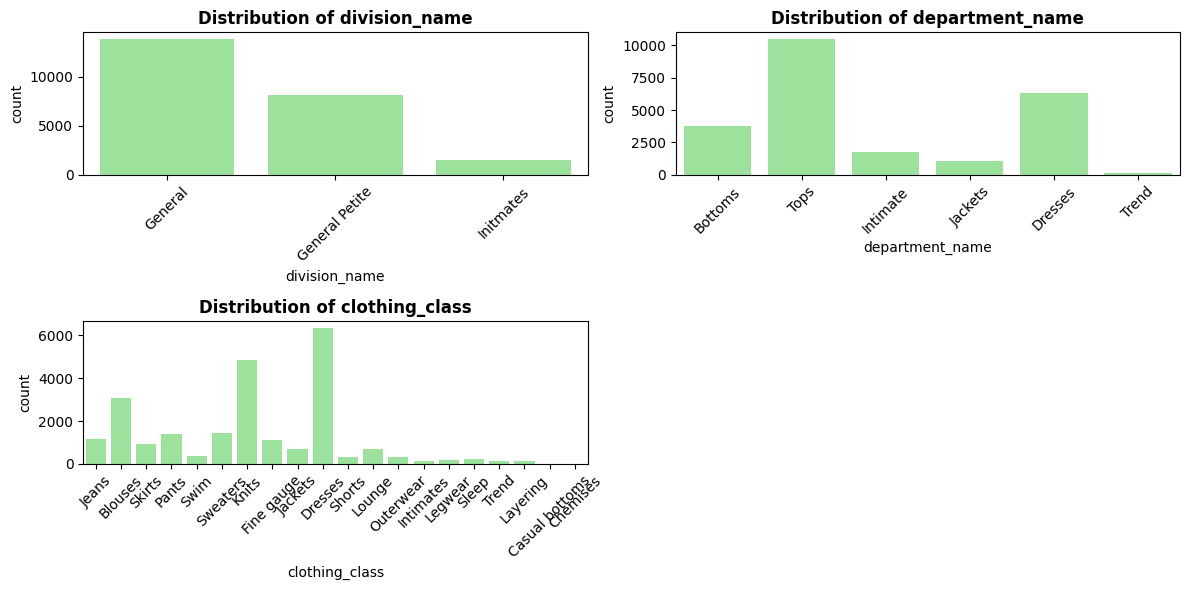

In [22]:
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate required rows

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten in case of a single row

# Loop through each categorical column and axis
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, color='LightGreen', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
# Remove any unused subplot axes
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])


# Adjust layout
plt.tight_layout()
plt.show()

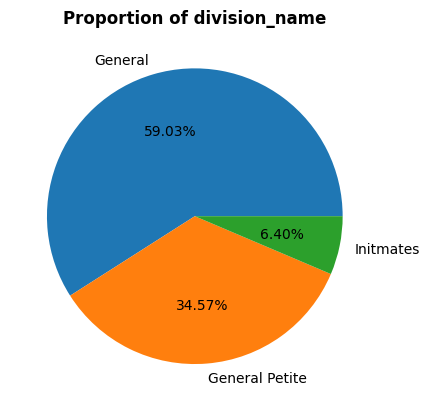

In [23]:
#UNIVARIATE ANALYSIS

division_name_count = df['division_name'].value_counts()
plt.pie(division_name_count,labels=division_name_count.index, autopct='%1.2f%%')
plt.title('Proportion of division_name', fontweight = 'bold')
plt.show()

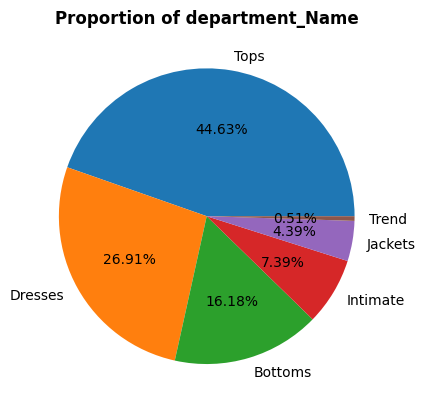

In [24]:
department_name_count = df['department_name'].value_counts()
plt.pie(department_name_count,labels=department_name_count.index, autopct='%1.2f%%')
plt.title('Proportion of department_Name', fontweight = 'bold')
plt.show()

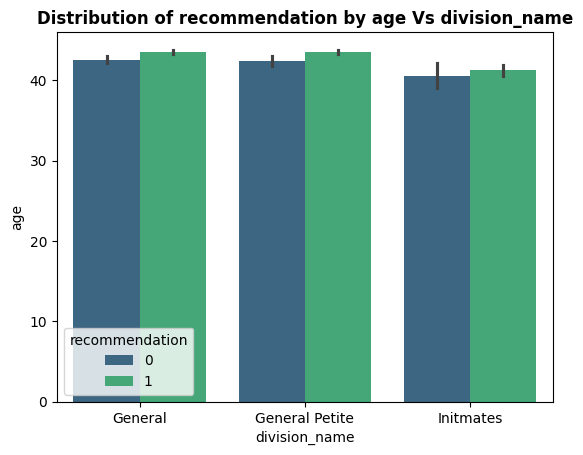

In [25]:
#BIVARIATE ANALYSIS

sns.barplot(x="division_name",y="age",hue="recommendation",data=df,palette='viridis')
plt.title("Distribution of recommendation by age Vs division_name", fontweight='bold')
plt.show()

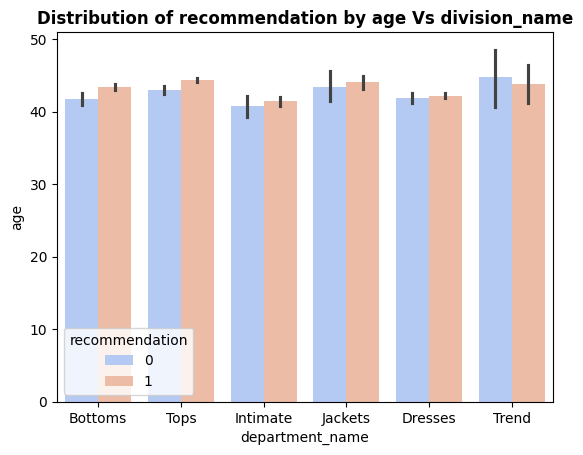

In [26]:
sns.barplot(x="department_name",y="age",hue="recommendation",data=df,palette='coolwarm')
plt.title("Distribution of recommendation by age Vs division_name", fontweight='bold')
plt.show()

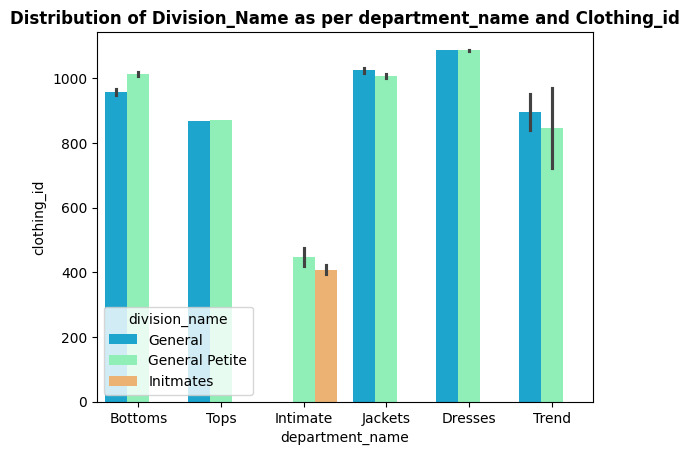

In [27]:
sns.barplot(x="department_name",y="clothing_id",hue="division_name",data=df,palette='rainbow')
plt.title("Distribution of Division_Name as per department_name and Clothing_id", fontweight='bold')
plt.show()

##**Distribution of Numerical Columns**

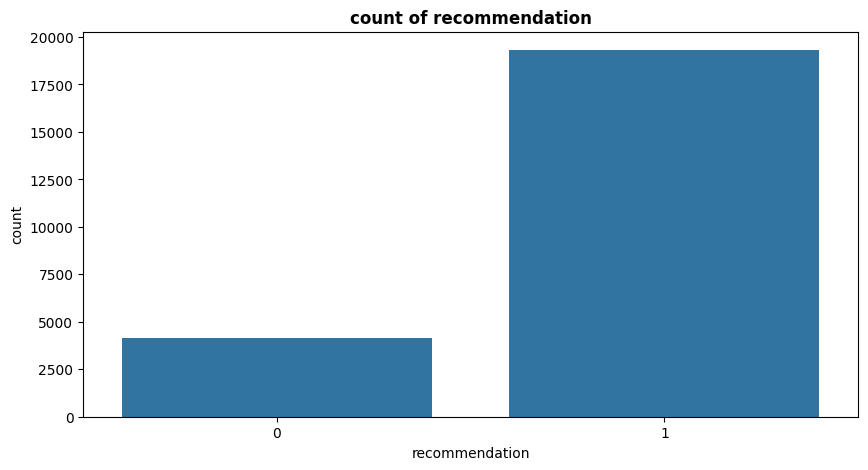

In [28]:
plt.figure(figsize =(10,5))
sns.countplot(x="recommendation",data=df)
plt.xlabel("recommendation")
plt.ylabel("count")
plt.title("count of recommendation", fontweight='bold')
plt.show()

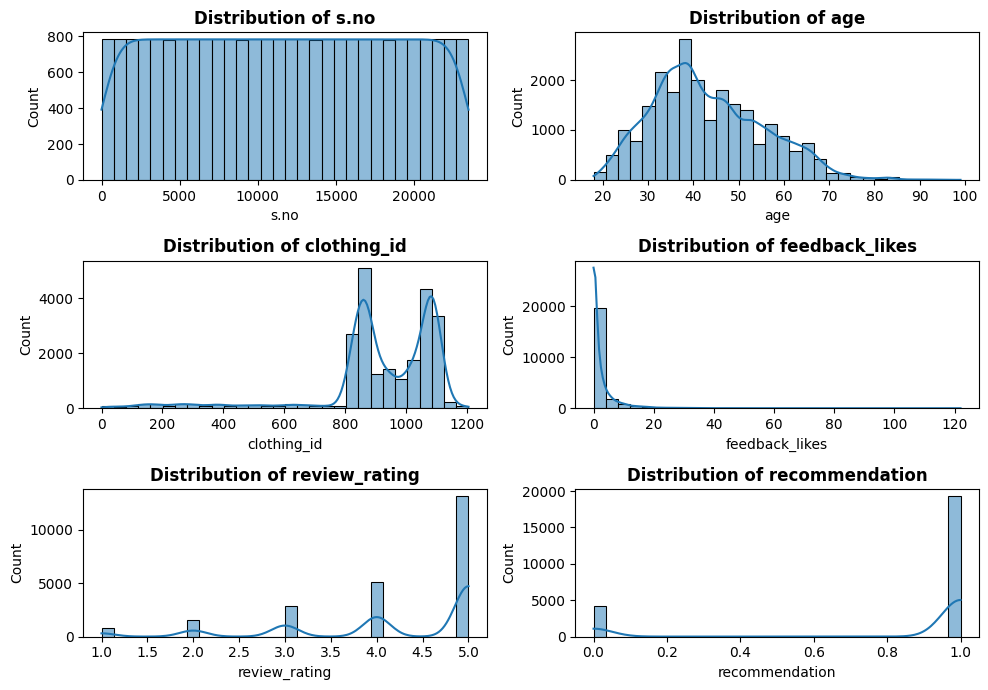

In [29]:
# Define the number of rows and columns for subplots
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10,7))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()




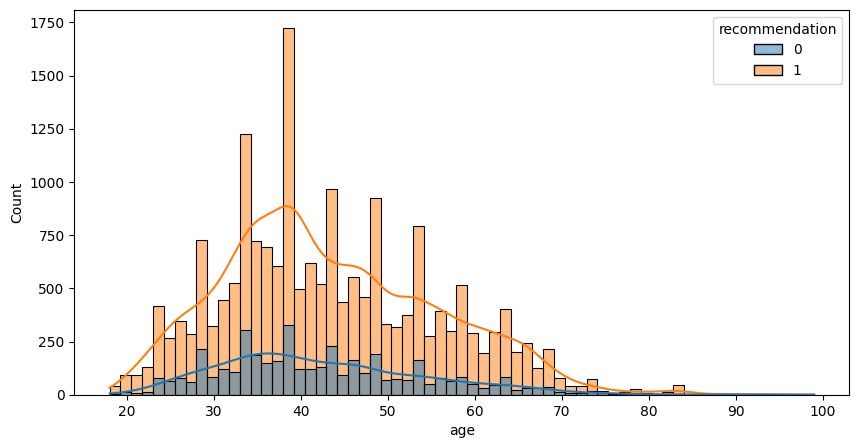

In [30]:
#UNIVARIATE ANALYSIS.

plt.figure(figsize=(10, 5))
sns.histplot(data=df,x="age",hue="recommendation",kde=True)
plt.show()

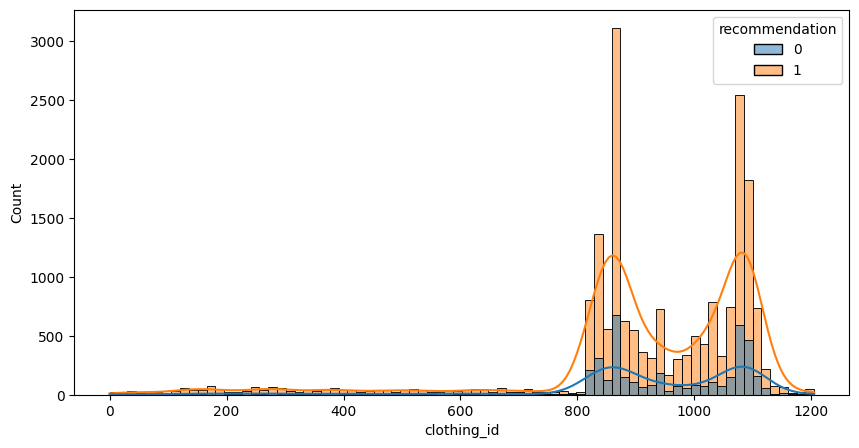

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x="clothing_id",hue="recommendation",kde=True)
plt.show()

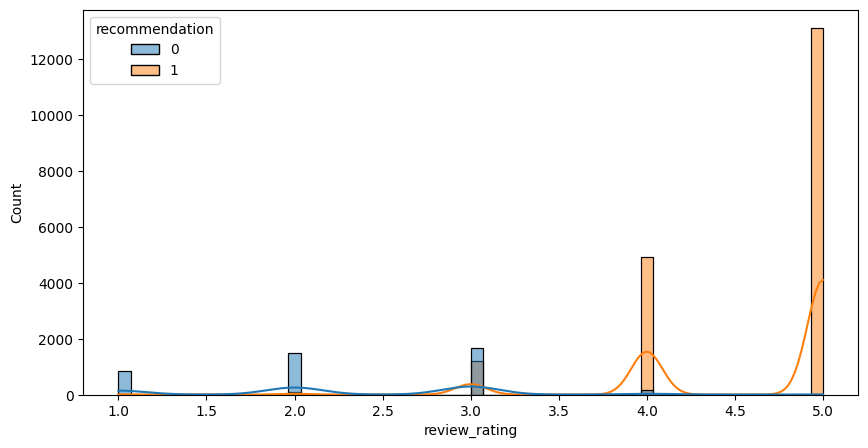

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x="review_rating",hue="recommendation",kde=True)
plt.show()

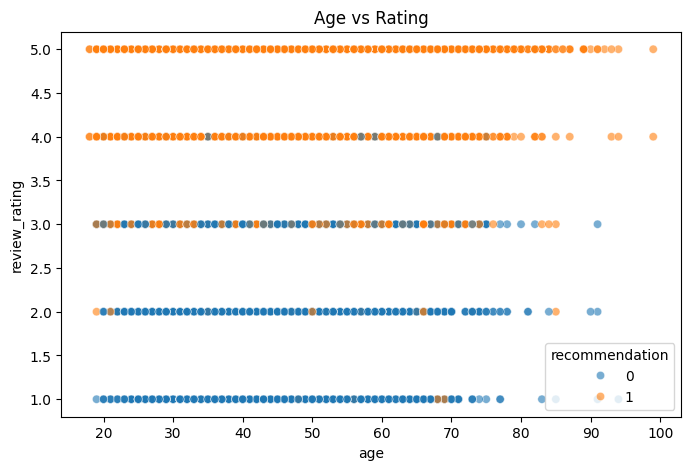

In [33]:
# BIVARIATE ANALYSIS
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='review_rating', hue='recommendation', alpha=0.6)
plt.title("Age vs Rating")
plt.show()

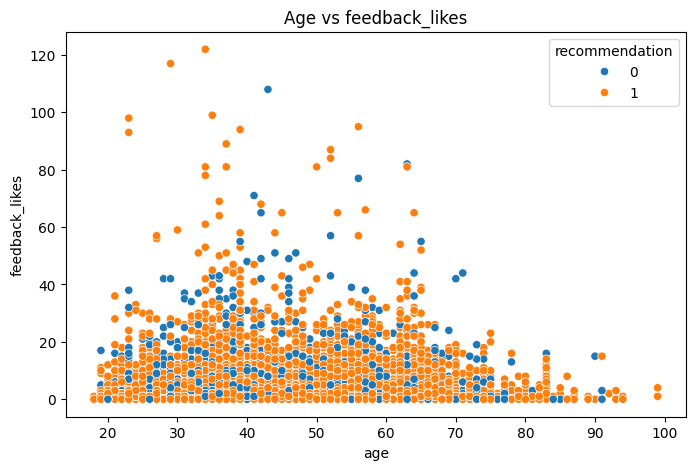

In [34]:
plt.figure(figsize=(8, 5))
plt.title("Age vs feedback_likes")
sns.scatterplot(x="age",y= "feedback_likes",hue= "recommendation",data=df)
plt.show()

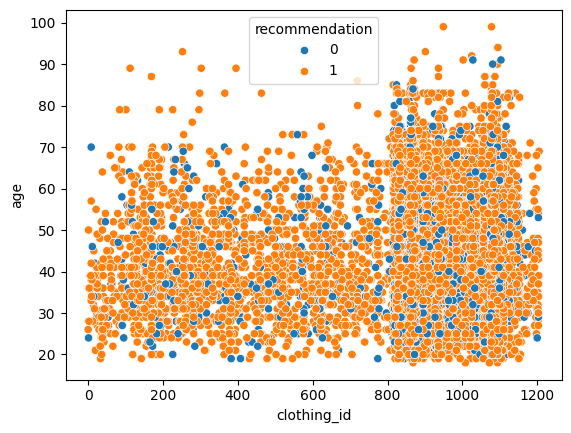

In [35]:
sns.scatterplot(data=df, x='clothing_id', y='age', hue='recommendation')
plt.show()

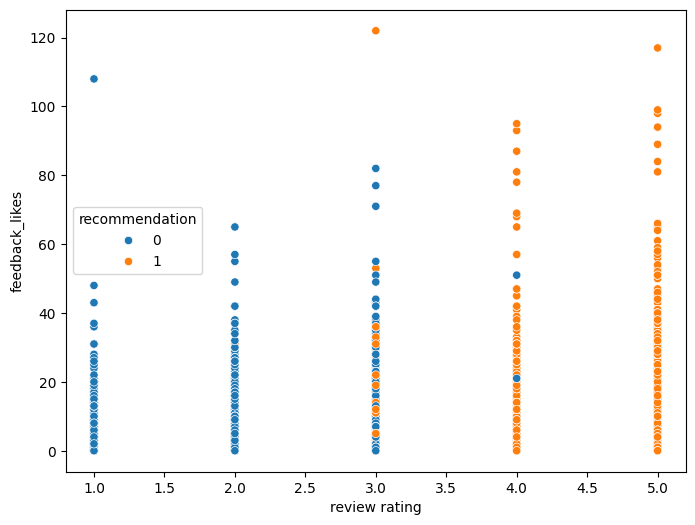

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='review_rating', y='feedback_likes', hue='recommendation')
plt.xlabel("review rating")
plt.show()

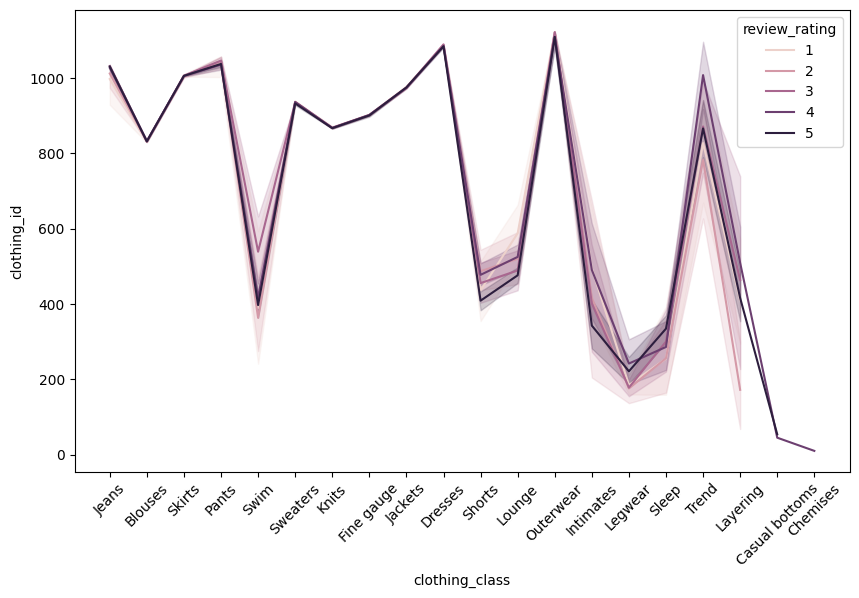

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='clothing_class', y='clothing_id', hue='review_rating')
plt.xticks(rotation=45)
plt.xlabel("clothing_class")
plt.show()

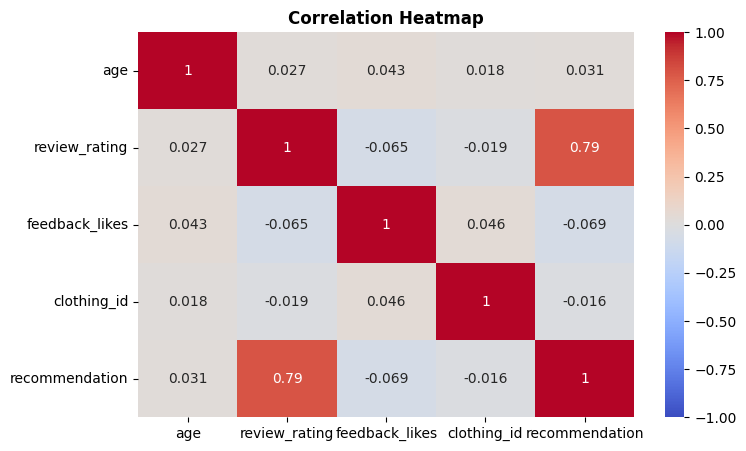

In [ ]:
# Compute the correlation matrix
corr_matrix = df[['age','review_rating','feedback_likes','clothing_id','recommendation']].corr()

# Set up the figure size
plt.figure(figsize=(8, 5))

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

#**DATA PREPROCESSING**

In [ ]:
df.head()

,s.no,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommendation
0,0,40,General,Bottoms,Jeans,1028,0,5,1
1,1,62,General Petite,Tops,Blouses,850,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,0,5,1
4,4,37,Initmates,Intimate,Swim,24,0,5,1


In [ ]:
df.isnull().sum()

,0
s.no,0
age,0
division_name,0
department_name,0
clothing_class,0
clothing_id,0
feedback_likes,0
review_rating,0
recommendation,0


##**OUTLIERS**

In [ ]:
num_cols = df[['age','clothing_id','feedback_likes','review_rating']]

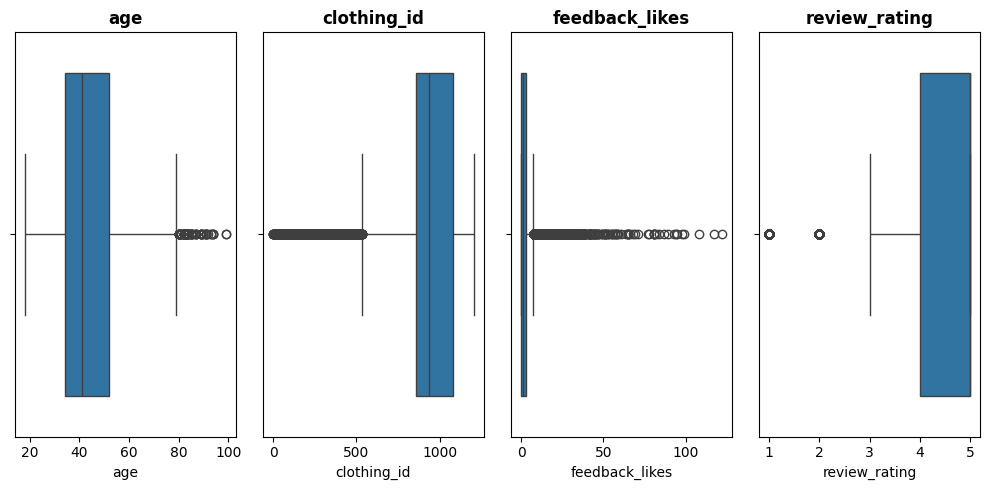

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(10,5))
for index, col in enumerate(num_cols):
  # Boxplot
  sns.boxplot(data=df, x=col, ax=axes[index])
  axes[index].set_title(f'{col}', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df = df[(df[column] >= Q1-1.5 *IQR) & (df[column] <= Q3+1.5*IQR)]

print(f"Column: \nQ1: {Q1},\nQ3: {Q3}, \nIQR: {IQR}, \nLower Bound: {lower_bound}, \nUpper Bound: {upper_bound}")

Column: 
Q1: 4.0,
Q3: 5.0, 
IQR: 1.0, 
Lower Bound: 2.5, 
Upper Bound: 6.5


In [ ]:
df.shape

(17892, 9)

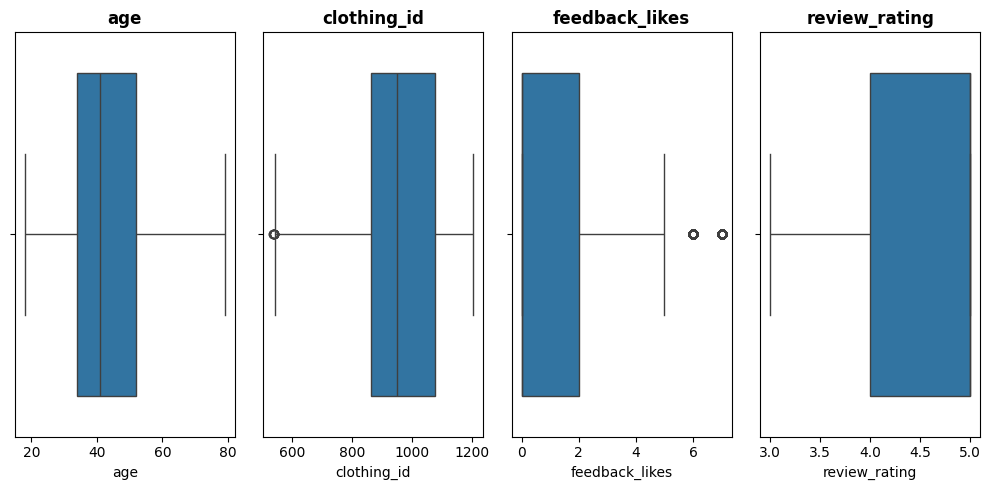

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(10,5))
for index, col in enumerate(num_cols):
  # Boxplot
  sns.boxplot(data=df, x=col, ax=axes[index])
  axes[index].set_title(f'{col}', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   s.no             17892 non-null  int64 
 1   age              17892 non-null  int64 
 2   division_name    17892 non-null  object
 3   department_name  17892 non-null  object
 4   clothing_class   17892 non-null  object
 5   clothing_id      17892 non-null  int64 
 6   feedback_likes   17892 non-null  int64 
 7   review_rating    17892 non-null  int64 
 8   recommendation   17892 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.4+ MB


##**Skewness**

In [ ]:
skew_column = df[['age','clothing_id','feedback_likes','review_rating']]

In [ ]:
from scipy.stats import skew
# Calculate skewness for each numerical feature
skewness = skew_column.skew() # skewness score
print("\nSkewness of Numerical Features Transformation:")
print(skewness)


Skewness of Numerical Features Transformation:
age               0.406554
clothing_id      -0.374714
feedback_likes    1.652958
review_rating    -1.033034
dtype: float64


In [ ]:
import numpy as np
skewed_columns = skewness[skewness.abs() > 0.5].index # squre root transformation for > 0.5 sk score
for column in skewed_columns:
    df[column] = np.sqrt(df[column])

In [ ]:
df.head()

,s.no,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommendation
0,0,40,General,Bottoms,Jeans,1028,0.000000,2.236068,1
3,3,45,General Petite,Bottoms,Pants,1068,0.000000,2.236068,1
5,5,43,General,Tops,Sweaters,933,0.000000,2.000000,1
7,7,34,General,Tops,Knits,868,1.414214,2.236068,1
8,8,49,General Petite,Tops,Fine gauge,900,2.000000,2.236068,1


In [ ]:
new_skewness = skew_column.skew()

In [ ]:
new_skewness

,0
age,0.406554
clothing_id,-0.374714
feedback_likes,1.652958
review_rating,-1.033034


In [ ]:
negatively_skewed = skewness[skewness < 0].index

In [ ]:
for column in negatively_skewed: # taking the negative skew to transform
    df[column] = np.sqrt(df[column] - df[column].min() + 1)

In [ ]:
df.head()

,s.no,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommendation
0,0,40,General,Bottoms,Jeans,22.203603,0.000000,1.226384,1
3,3,45,General Petite,Bottoms,Pants,23.086793,0.000000,1.226384,1
5,5,43,General,Tops,Sweaters,19.949937,0.000000,1.126033,1
7,7,34,General,Tops,Knits,18.248288,1.414214,1.226384,1
8,8,49,General Petite,Tops,Fine gauge,19.104973,2.000000,1.226384,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   s.no             17892 non-null  int64  
 1   age              17892 non-null  int64  
 2   division_name    17892 non-null  object 
 3   department_name  17892 non-null  object 
 4   clothing_class   17892 non-null  object 
 5   clothing_id      17892 non-null  float64
 6   feedback_likes   17892 non-null  float64
 7   review_rating    17892 non-null  float64
 8   recommendation   17892 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


In [ ]:
df.head()

,s.no,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommendation
0,0,40,General,Bottoms,Jeans,22.203603,0.000000,1.226384,1
3,3,45,General Petite,Bottoms,Pants,23.086793,0.000000,1.226384,1
5,5,43,General,Tops,Sweaters,19.949937,0.000000,1.126033,1
7,7,34,General,Tops,Knits,18.248288,1.414214,1.226384,1
8,8,49,General Petite,Tops,Fine gauge,19.104973,2.000000,1.226384,1


##**FEATURE ENGINEERING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,s.no,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommendation
0,0,40,0,0,5,22.203603,0.000000,1.226384,1
3,3,45,1,0,11,23.086793,0.000000,1.226384,1
5,5,43,0,4,15,19.949937,0.000000,1.126033,1
7,7,34,0,4,6,18.248288,1.414214,1.226384,1
8,8,49,1,4,2,19.104973,2.000000,1.226384,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17892 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   s.no             17892 non-null  int64  
 1   age              17892 non-null  int64  
 2   division_name    17892 non-null  int64  
 3   department_name  17892 non-null  int64  
 4   clothing_class   17892 non-null  int64  
 5   clothing_id      17892 non-null  float64
 6   feedback_likes   17892 non-null  float64
 7   review_rating    17892 non-null  float64
 8   recommendation   17892 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


In [ ]:
df.isnull().sum()

,0
s.no,0
age,0
division_name,0
department_name,0
clothing_class,0
clothing_id,0
feedback_likes,0
review_rating,0
recommendation,0


###**FEATURE SELECTION**

In [ ]:
X = df.drop(columns=['s.no','recommendation'])  # Drop the target variable column
y = df['recommendation']  # Target variable

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Clean the data
X_clean = X.dropna(axis=1)  # Drop columns with NaN
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

SelectKBest(k=5)

In [ ]:
select_features= X.columns[selector.get_support()]
print(select_features) # placing in x.columns as selected features

Index(['age', 'division_name', 'department_name', 'feedback_likes',
       'review_rating'],
      dtype='object')


In [ ]:
X_selected = X[select_features]

In [ ]:
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
6,review_rating,10685.794856
5,feedback_likes,29.661663
0,age,21.597910
1,division_name,4.279224
2,department_name,1.362224
4,clothing_id,0.600599
3,clothing_class,0.117061


#**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable
# 80% training and 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 7), (3579, 7), (14313,), (3579,))

###**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.head()

,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating
22396,60,0,4,0,16.792856,0.000000,1.226384
14771,55,1,1,1,24.000000,2.449490,1.226384
9147,50,0,4,6,18.357560,1.732051,1.000000
1639,33,1,1,1,23.302360,0.000000,1.226384
20459,49,0,4,0,17.748239,0.000000,1.226384


#**BUILD MACHINE LEARNING MODEL**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score # importing the evaluvate metrix  accuracy score fl score
from sklearn.linear_model import LogisticRegression # importing all the ml unsupervised model to  find the best model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Initialize an empty dictionary to store the results
results = {}

# Iterate through classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store the results
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Support Vector Classifier,Naive Bayes,XGBoost
Accuracy,0.927633,0.910869,0.927354,0.935736,0.914781,0.93378,0.928751
F1 Score,0.960440,0.953260,0.960159,0.964756,0.955494,0.96280,0.960967


In [ ]:
best_model_name = max(results, key=lambda name: results[name]['F1 Score'])
best_model_metrics = results[best_model_name]

print(f"\nSelected Model: {best_model_name}")
print(f"Accuracy: {best_model_metrics['Accuracy']:.4f}")
print(f"F1 Score: {best_model_metrics['F1 Score']:.4f}")


Selected Model: Random Forest
Accuracy: 0.9357
F1 Score: 0.9648


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Retrieve the best-performing model from our dictionary
best_model = classifiers[best_model_name]

# Train the model on the training dataset
best_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute and display the classification report (which includes precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"\nPerformance Evaluation of {best_model_name}:")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Performance Evaluation of Random Forest:
Confusion Matrix:
[[ 190  115]
 [ 129 3145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       305
           1       0.96      0.96      0.96      3274

    accuracy                           0.93      3579
   macro avg       0.78      0.79      0.79      3579
weighted avg       0.93      0.93      0.93      3579



In [ ]:
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"\nValidation Metrics for the {best_model_name} Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Validation Metrics for the Random Forest Model:
Accuracy: 0.9318
Precision: 0.9647
Recall: 0.9606
F1-Score: 0.9627


#**ROC Curve and AUC**

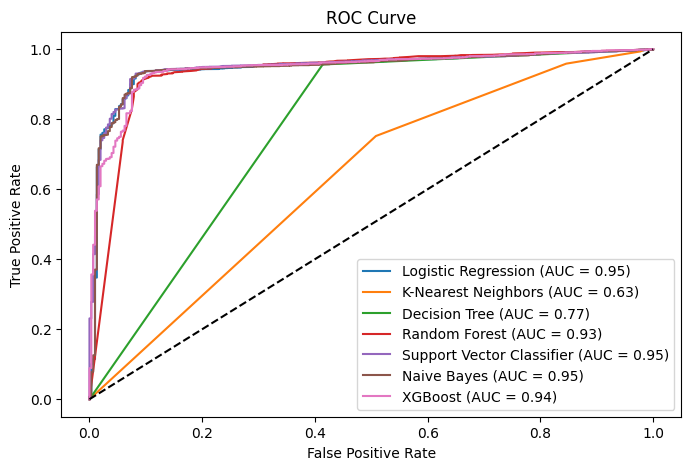

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#**Naive Bayes Classification Dataset**

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/NandhiniR1989/MLDataset/refs/heads/main/Women%20Dresses%20Reviews%20Dataset%20.csv')
df1.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [ ]:
df1.rename(columns= {'recommend_index ': 'recommend'}, inplace = True)

In [ ]:
df1.drop(columns=['s.no', 'age', 'division_name', 'department_name', 'class_name','clothing_id', 'alike_feedback_count', 'rating'], inplace=True)

df1.head()

,title,review_text,recommend
0,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,1
1,Lovely and unique!,As is true of a bunch of the fall clothing pho...,1
2,Meh,"I so wanted this skirt to work, love the desig...",0
3,Wow,Love love this! i was hesitant to buy this at ...,1
4,Great for bigger busts,I absolutely love the retro look of this swims...,1


In [ ]:
nan_title = df1[df1['title'].isna()]

# Display the rows with NaN in 'title'
print(nan_title)

      title                                        review_text  recommend
14      NaN  Love it; the bit of stretch in the denim makes...          1
19      NaN  Beautiful top, i love the peplum. the color is...          1
23      NaN  Very nice but thin materal. very sheer. i pair...          1
34      NaN  These shorts are super comfy and the color is ...          1
48      NaN  I just purchased this blouse in store! the fab...          1
...     ...                                                ...        ...
23464   NaN  I got this before the winter. so i could wear ...          1
23465   NaN  Great shirt! i am a tshirt wearing girl so i l...          1
23479   NaN  Nice twist on a basic t-shirt. pictures don't ...          1
23480   NaN  I have to agree with the first reviewer! i rea...          0
23485   NaN  Super cute jacket .perfect for fall i can't st...          1

[3810 rows x 3 columns]


In [ ]:
df1['title'] = df1.apply(
    lambda row: "Good" if (pd.isna(row['title']) or row['title'] == "") and row['recommend'] == 1
                else "Bad" if (pd.isna(row['title']) or row['title'] == "") and row['recommend'] != 1
                else row['title'],
    axis=1
)

In [ ]:
nan_title = df1[df1['title'].isna()]

# Display the rows with NaN in 'nan_title'
print(nan_title)

Empty DataFrame
Columns: [title, review_text, recommend]
Index: []


In [ ]:
df1['recommend'].value_counts()

,count
recommend,
1,19314
0,4172


In [ ]:
df1.shape

(23486, 3)

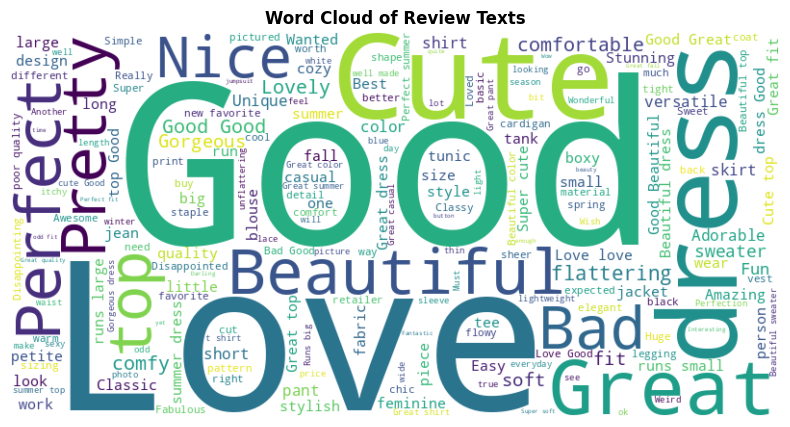

In [ ]:
from wordcloud import WordCloud

# Combine all title into a single string
text = " ".join(review for review in df1['title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title(f'Word Cloud of Review Texts',fontweight='bold')
plt.show()

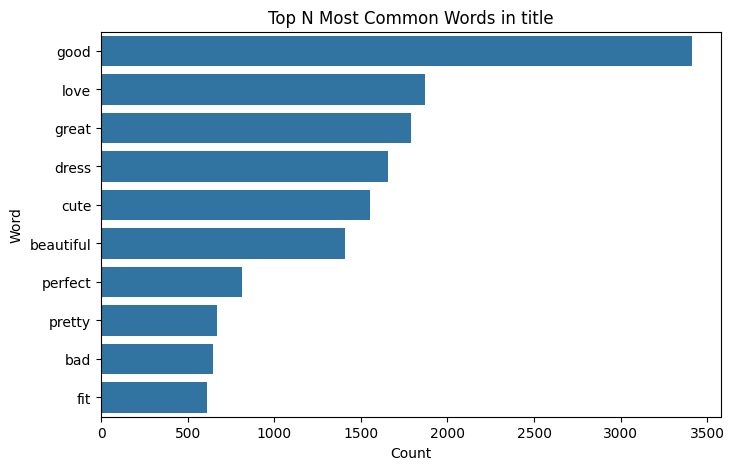

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize and get top N words
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Adjust max_features as needed
X_counts = vectorizer.fit_transform(df1['title'].dropna())

# Create DataFrame for plotting
word_counts = X_counts.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'Word': words, 'Count': word_counts}).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Word', data=top_words)
plt.title('Top N Most Common Words in title')
plt.show()

In [ ]:
# Split the dataset into features and target
X = df1['title']
y = df1['recommend']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

In [ ]:
# Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
df1_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
# Filter out columns with counts greater than 10
df1_vectorized.loc[:, (df1_vectorized.sum() > 10)]

,about,absolutely,add,addition,adorable,after,ag,airy,all,almost,...,would,wow,wrong,xl,year,yes,yet,you,your,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create and Train the Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Evaluate the model
print("MultinomialNB Accuracy:", model.score(X_test_vectorized, y_test))

MultinomialNB Accuracy: 0.9005959982971478


In [ ]:
# Vectorization using CountVectorizer
vectorizer = CountVectorizer(binary=True)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
df_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
# Filter out columns with counts greater than 10
df_vectorized.loc[:, (df_vectorized.sum() > 10)]

,about,absolutely,add,addition,adorable,after,ag,airy,all,almost,...,would,wow,wrong,xl,year,yes,yet,you,your,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Initialize the model
model = BernoulliNB()

# Train the model
model.fit(X_train_vectorized, y_train)

accuracy = model.score(X_test_vectorized, y_test)
print(f'BernoulliNB Accuracy: {accuracy:.2f}')

BernoulliNB Accuracy: 0.89


In [ ]:
# New review_text for prediction
new_title = ["Disappointing"]

# Transform the review text
new_review_vectorized = vectorizer.transform(new_title)

# Make prediction
prediction = model.predict(new_review_vectorized)

# Map the prediction back to label
recommend = 1 if prediction[0] == 1 else 0
print(f'The recommend is classified as: {recommend}')

The recommend is classified as: 0


In [ ]:
new_title_recommend = ["Love it!!!"]

# Vectorize the new email
new_email_vectorized_ham = vectorizer.transform(new_title_recommend)

# Make prediction
prediction_ham = model.predict(new_email_vectorized_ham)

# Map the prediction back to label
recommend = 0 if prediction[0] == 1 else 1
print(f'The recommend is classified as: {recommend}')

The recommend is classified as: 1
